In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
customer_df = pd.read_csv("/Users/giulianamiranda/Documents/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv", sep = ',')

cols = []

for a in range(len(customer_df.columns)):
    cols.append(customer_df.columns[a].lower().replace(' ', '_'))
    
customer_df.columns = cols



In [3]:
# Open the categoricals variable we created before

categoricals = customer_df.select_dtypes(include=[object])

In [4]:
# Plot all the categorical variables with the proper plot

# I chose to drop the customer column since it wouldn´t help interpreting it

categoricals = categoricals.drop(['customer'], axis=1)

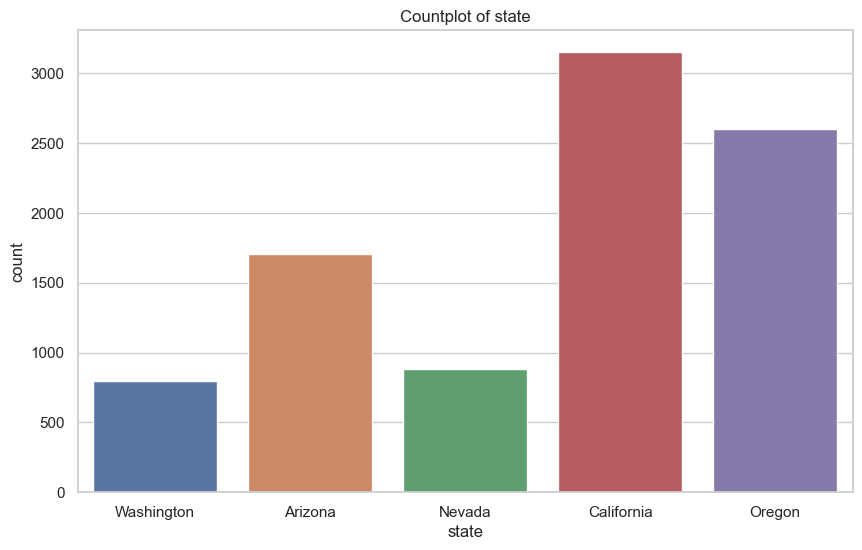

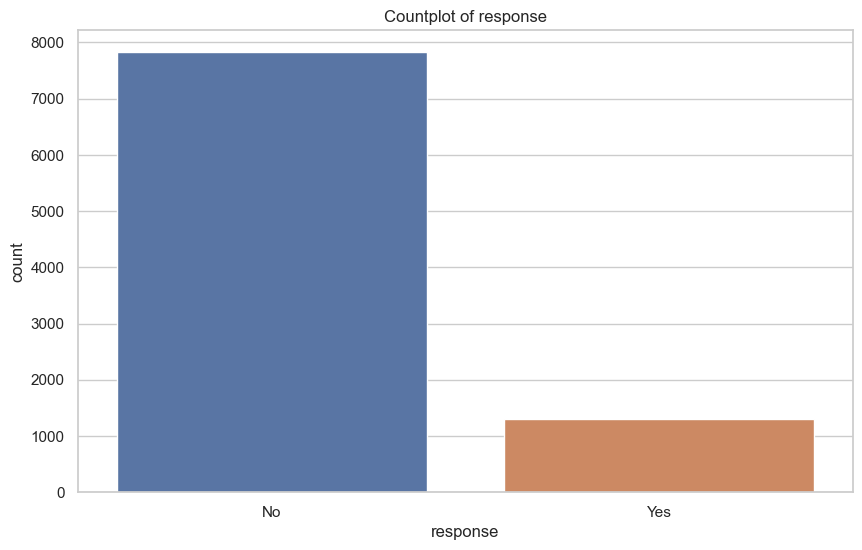

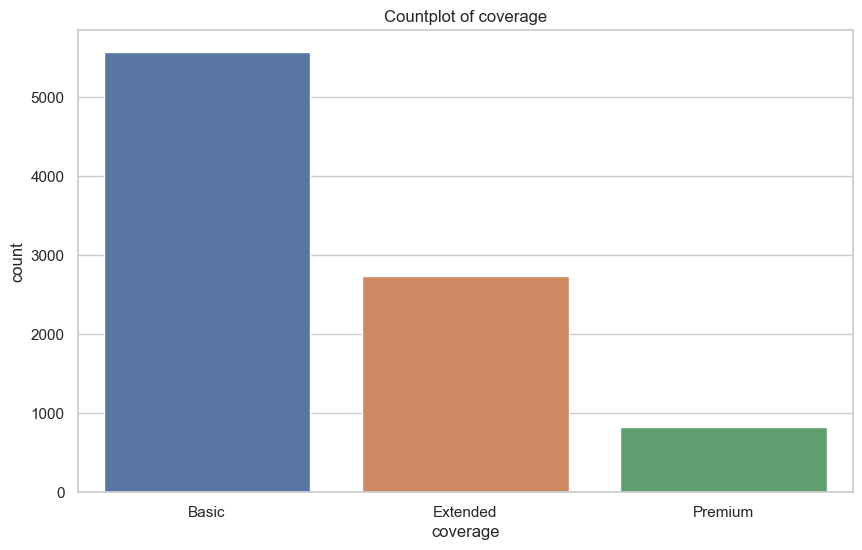

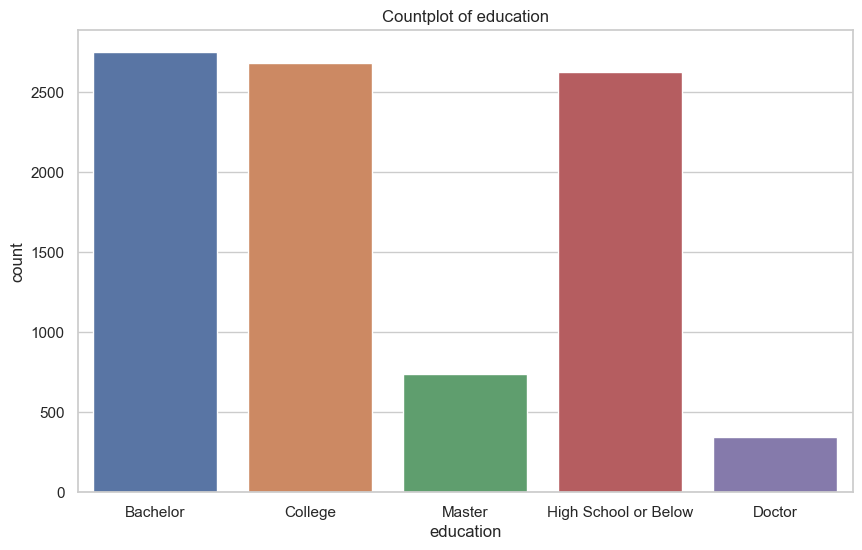

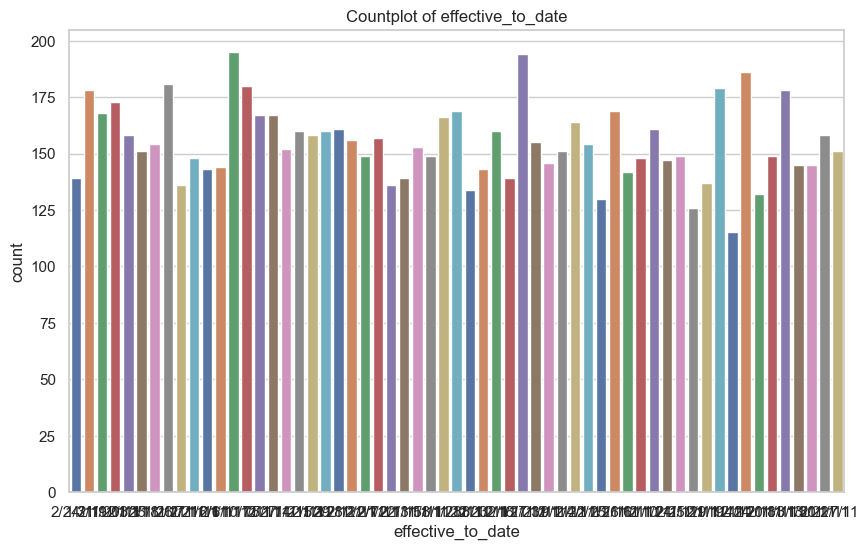

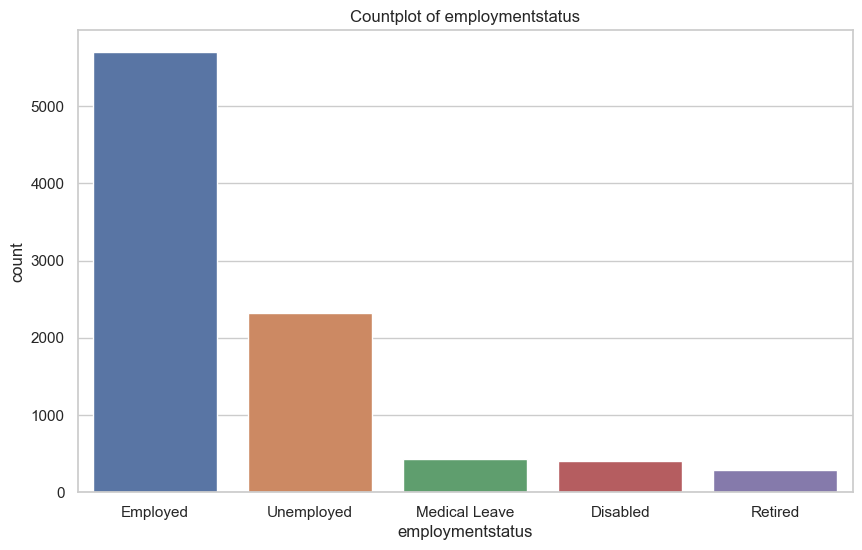

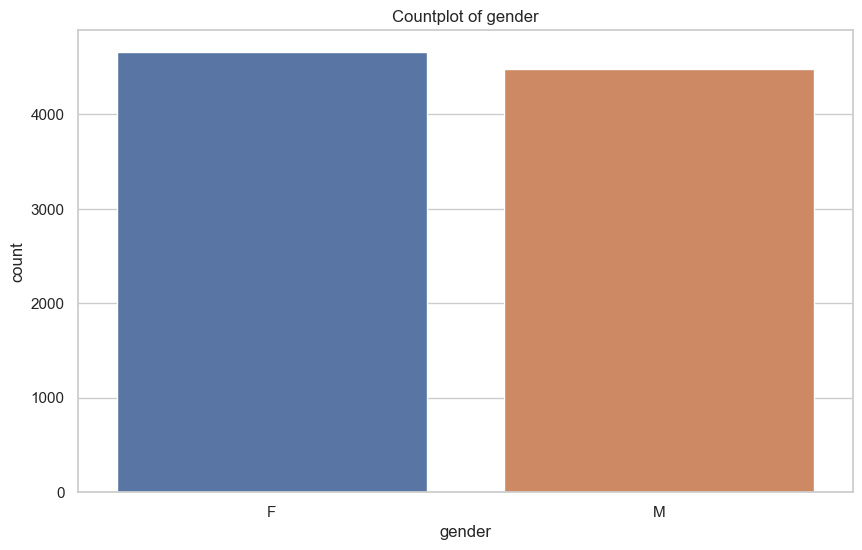

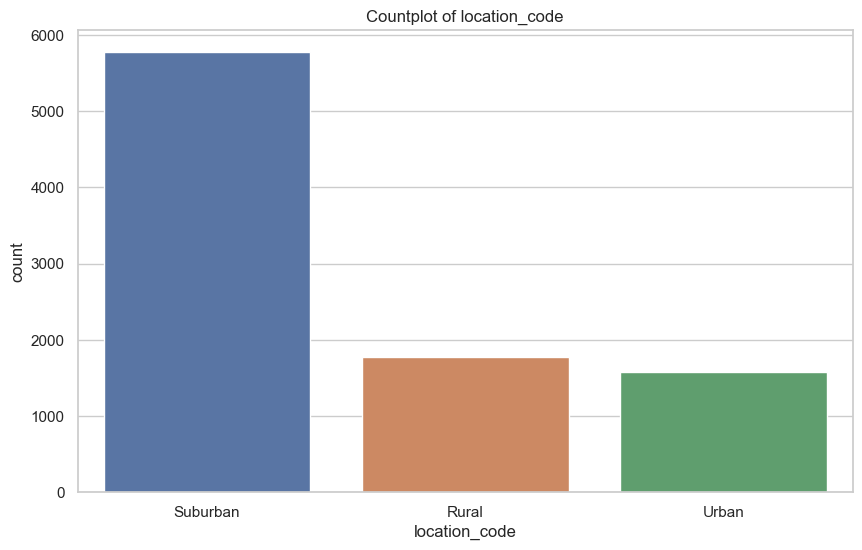

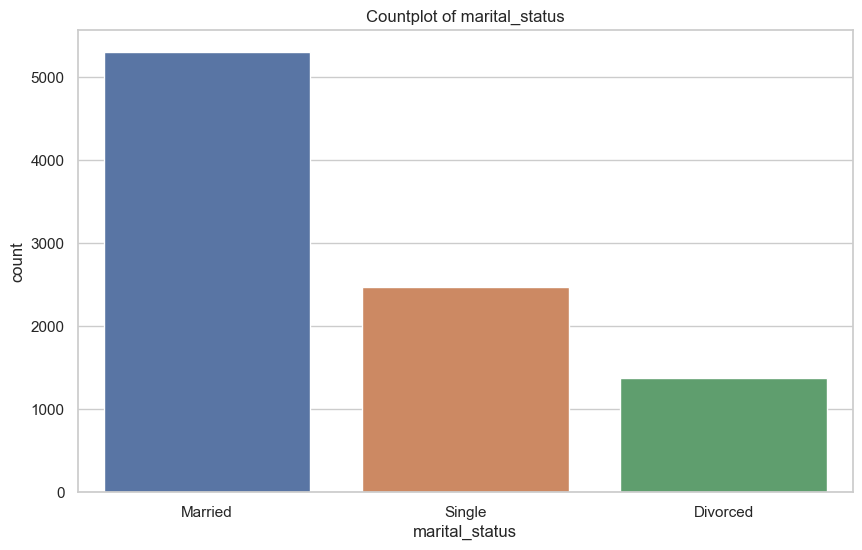

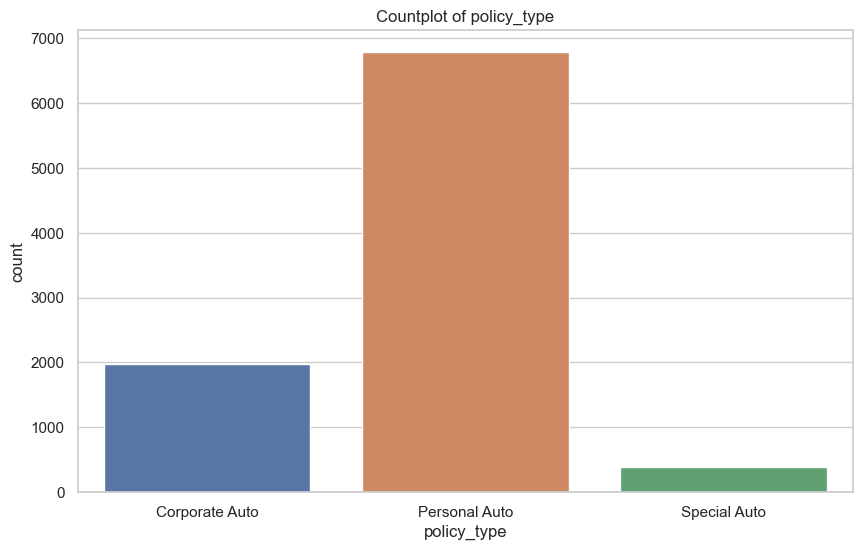

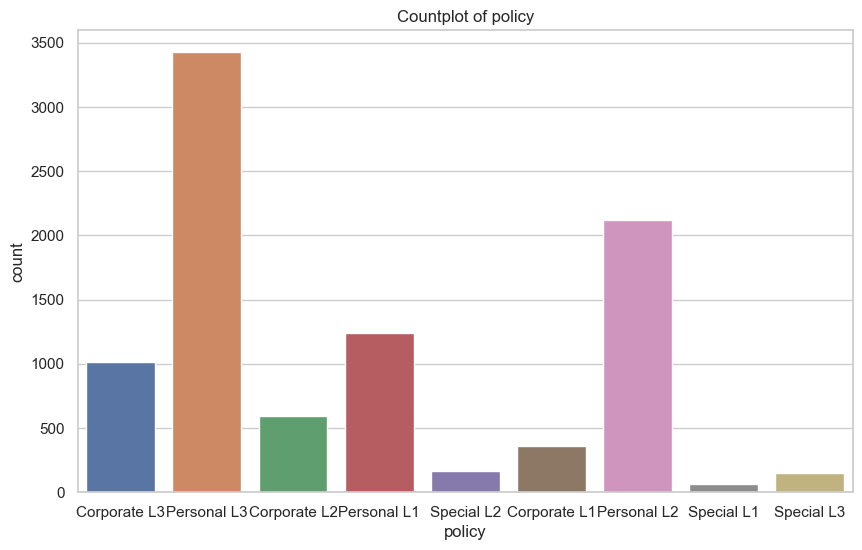

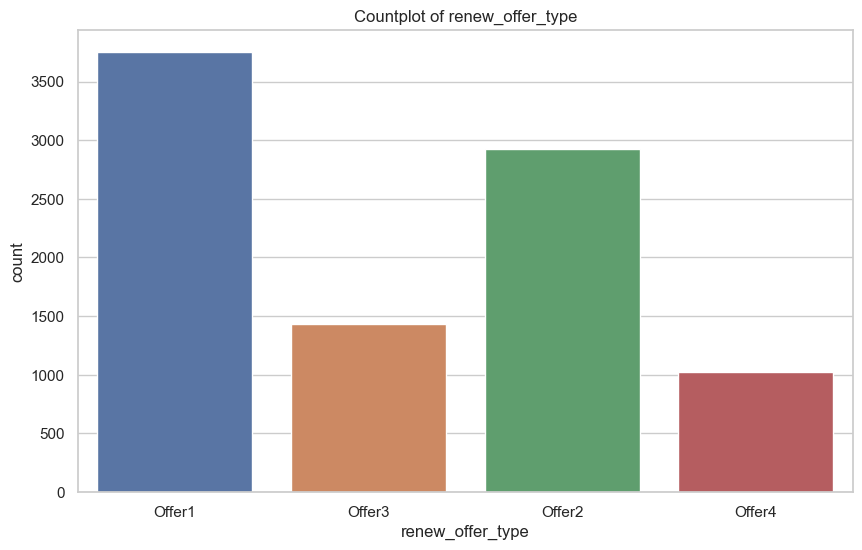

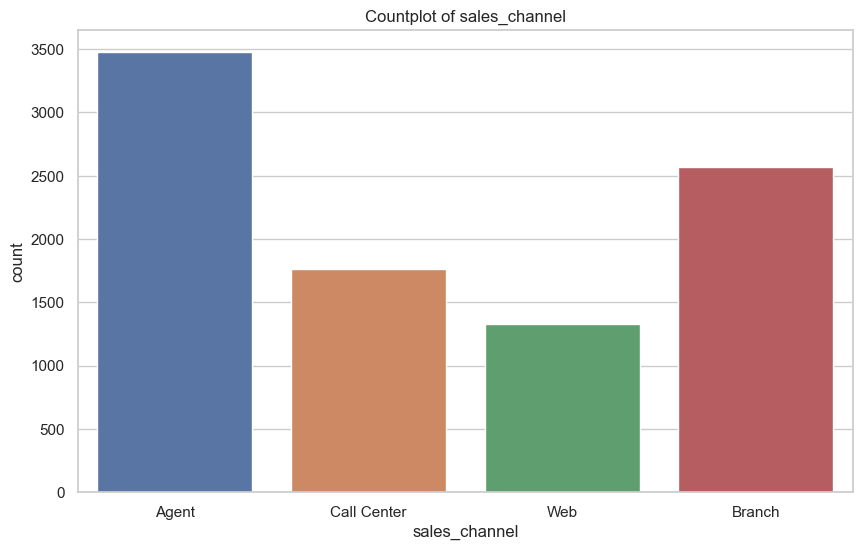

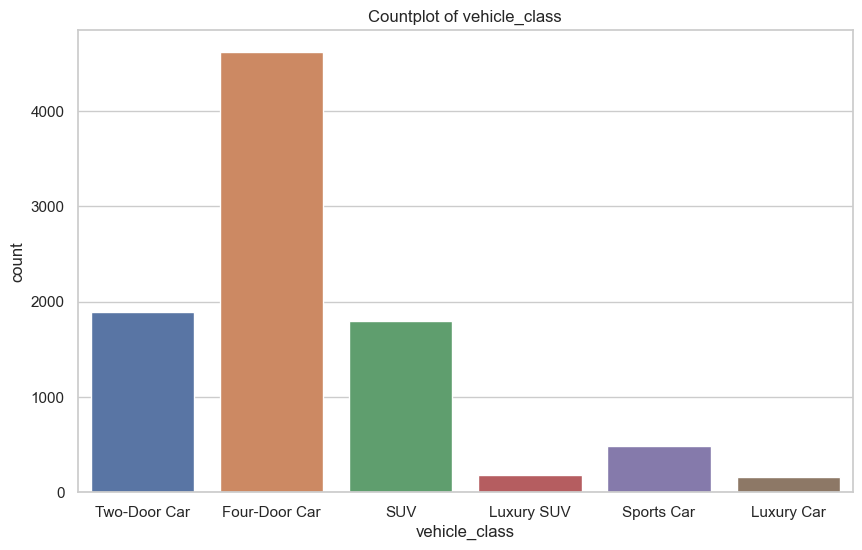

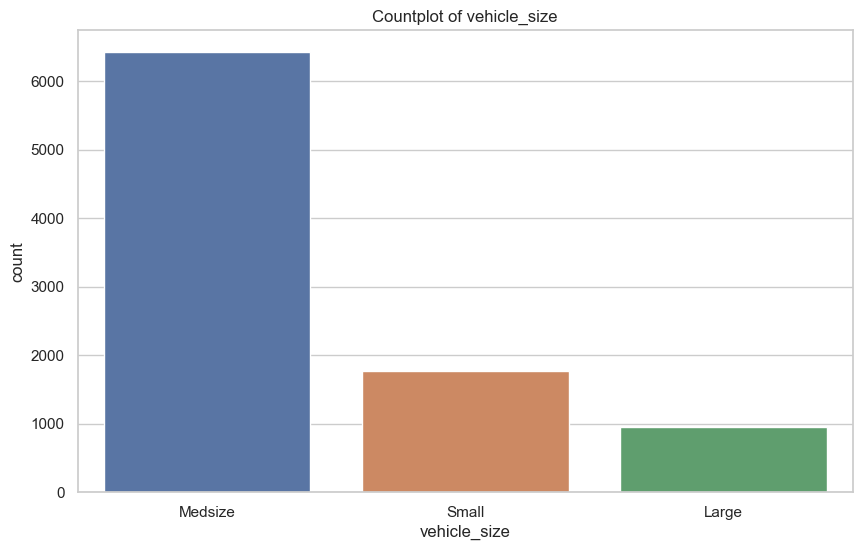

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for column in categoricals.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=categoricals, palette="deep")
    plt.title(f'Countplot of {column}')
    plt.show()


In [ ]:
# The plots show useful insights on the customers, such as: 
# Most clients are from California and Oregon, have the basic coverage of the insurance and live in the suburbs
# Almost 80% didn't respond
# The sample is almost gender balenced, but there are more woman overall

# There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# Plot time variable. Can you extract something from it?


In [9]:
# There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

# Yes, policy and policy type are redunct. I chose to drop the one with less in-depth info: policy type 

categoricals = categoricals.drop(['policy_type'], axis=1)


Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [15]:
categoricals['effective_to_date'] = pd.to_datetime(categoricals['effective_to_date'])


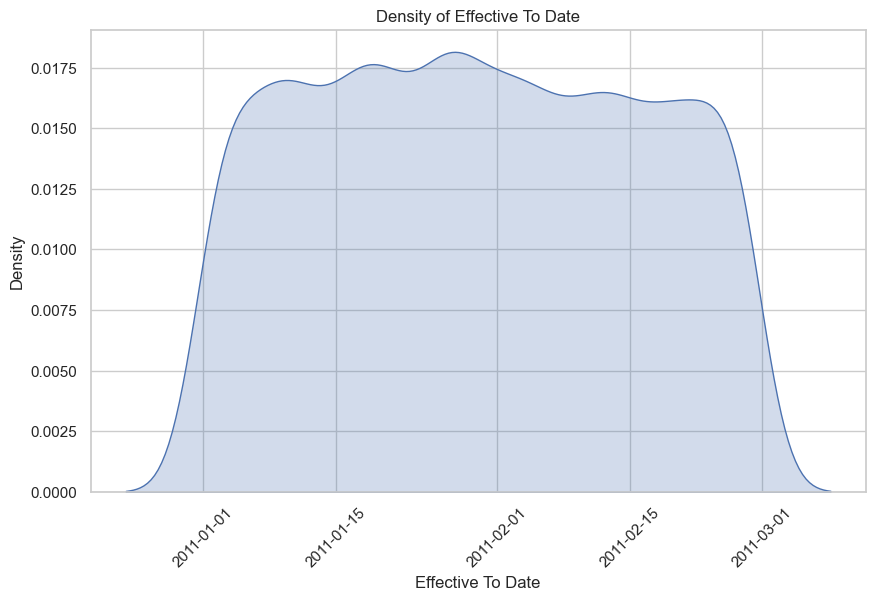

In [18]:
# Plot time variable

plt.figure(figsize=(10, 6))
sns.kdeplot(categoricals['effective_to_date'], fill=True, palette='deep')
plt.title('Density of Effective To Date')
plt.xlabel('Effective To Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

# Can you extract something from it?

# Clients were more active contracting the services in the second half of January